In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 8:2
df = pd.read_csv('../../Dataset/ACB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,11361.0
1,3/4/2019,11512.4
2,3/5/2019,11474.6
3,3/6/2019,11474.6
4,3/7/2019,11550.3
...,...,...
1303,5/27/2024,29450.0
1304,5/28/2024,29650.0
1305,5/29/2024,29250.0
1306,5/30/2024,25565.2


In [4]:
data

,Price
0,11361.0
1,11512.4
2,11474.6
3,11474.6
4,11550.3
...,...
1303,29450.0
1304,29650.0
1305,29250.0
1306,25565.2


In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 8:2
train_size = int(0.8 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [7]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [9]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 11.592677606286323
Mean Absolute Error (MAE): 3100.1016833198655
Root Mean Squared Error (RMSE): 3512.4499256783806


In [10]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[28984.0628425 ]
 [28998.01093713]
 [29011.95903177]
 [29025.9071264 ]
 [29039.85522104]
 [29053.80331568]
 [29067.75141031]
 [29081.69950495]
 [29095.64759959]
 [29109.59569422]
 [29123.54378886]
 [29137.49188349]
 [29151.43997813]
 [29165.38807277]
 [29179.3361674 ]
 [29193.28426204]
 [29207.23235668]
 [29221.18045131]
 [29235.12854595]
 [29249.07664058]
 [29263.02473522]
 [29276.97282986]
 [29290.92092449]
 [29304.86901913]
 [29318.81711377]
 [29332.7652084 ]
 [29346.71330304]
 [29360.66139767]
 [29374.60949231]
 [29388.55758695]]
RangeIndex(start=1307, stop=1337, step=1)


In [11]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[28998.01093713]
 [29011.95903177]
 [29025.9071264 ]
 [29039.85522104]
 [29053.80331568]
 [29067.75141031]
 [29081.69950495]
 [29095.64759959]
 [29109.59569422]
 [29123.54378886]
 [29137.49188349]
 [29151.43997813]
 [29165.38807277]
 [29179.3361674 ]
 [29193.28426204]
 [29207.23235668]
 [29221.18045131]
 [29235.12854595]
 [29249.07664058]
 [29263.02473522]
 [29276.97282986]
 [29290.92092449]
 [29304.86901913]
 [29318.81711377]
 [29332.7652084 ]
 [29346.71330304]
 [29360.66139767]
 [29374.60949231]
 [29388.55758695]
 [29402.50568158]
 [29416.45377622]
 [29430.40187085]
 [29444.34996549]
 [29458.29806013]
 [29472.24615476]
 [29486.1942494 ]
 [29500.14234404]
 [29514.09043867]
 [29528.03853331]
 [29541.98662794]
 [29555.93472258]
 [29569.88281722]
 [29583.83091185]
 [29597.77900649]
 [29611.72710113]
 [29625.67519576]
 [29639.6232904 ]
 [29653.57138503]
 [29667.51947967]
 [29681.46757431]
 [29695.41566894]
 [29709.36376358]
 [29723.31185822]

In [12]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[28984.0628425 ]
 [28998.01093713]
 [29011.95903177]
 [29025.9071264 ]
 [29039.85522104]
 [29053.80331568]
 [29067.75141031]
 [29081.69950495]
 [29095.64759959]
 [29109.59569422]
 [29123.54378886]
 [29137.49188349]
 [29151.43997813]
 [29165.38807277]
 [29179.3361674 ]
 [29193.28426204]
 [29207.23235668]
 [29221.18045131]
 [29235.12854595]
 [29249.07664058]
 [29263.02473522]
 [29276.97282986]
 [29290.92092449]
 [29304.86901913]
 [29318.81711377]
 [29332.7652084 ]
 [29346.71330304]
 [29360.66139767]
 [29374.60949231]
 [29388.55758695]
 [29402.50568158]
 [29416.45377622]
 [29430.40187085]
 [29444.34996549]
 [29458.29806013]
 [29472.24615476]
 [29486.1942494 ]
 [29500.14234404]
 [29514.09043867]
 [29528.03853331]
 [29541.98662794]
 [29555.93472258]
 [29569.88281722]
 [29583.83091185]
 [29597.77900649]
 [29611.72710113]
 [29625.67519576]
 [29639.6232904 ]
 [29653.57138503]
 [29667.51947967]
 [29681.46757431]
 [29695.41566894]
 [29709.36376358]

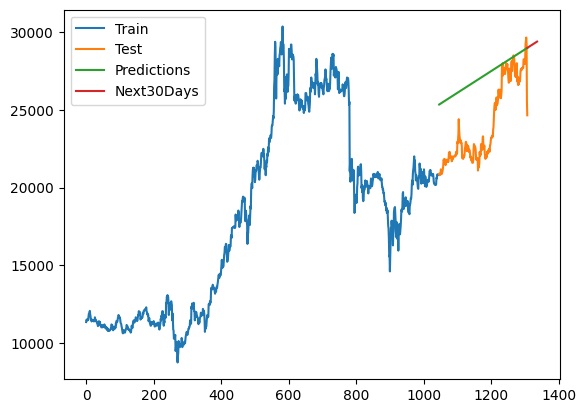

In [13]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

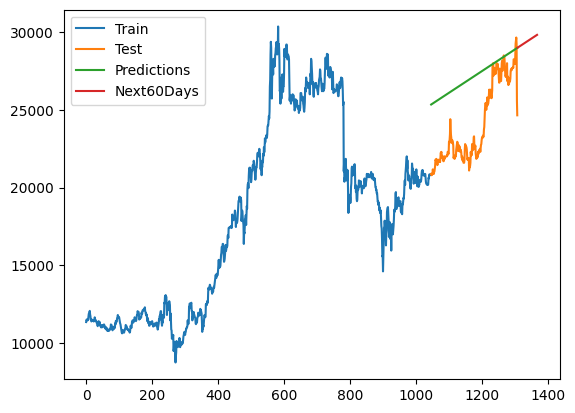

In [14]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

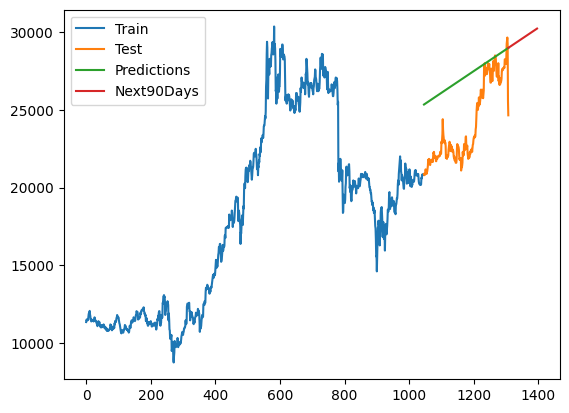

In [15]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()